<a href="https://colab.research.google.com/github/samanehPahlavani/MscFraudDetection/blob/main/TronFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect Google Drive For Dataset

In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Librarries

In [183]:
####Libraries Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

%matplotlib inline
import sklearn

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [184]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold

In [185]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [186]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVR

In [187]:
from sklearn import metrics # for checking the model accuracy

In [188]:
from sklearn.model_selection import cross_val_score

In [189]:
!pip install pandas_ml

In [190]:
# Import the necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB


# Functions Def

In [205]:
def LoadData(data):
  warnings.filterwarnings('ignore')
  pd.options.display.max_columns = None
  pd.options.display.max_rows = None
  df = pd.read_csv(os.path.join("/content/drive/MyDrive/EtherFirstDataSet/", data+".csv"))
  return df
#Load datas
def preprocessing(CVV):

  df1 = LoadData(str(CVV))

  df1_fillna = df1.copy()
#"Address"	,"Flag","Avg_min_between_received_tnx",	"Avg_min_between_sent_tnx",	"Total_transaction" ,
#"Sent_tnx", "Received_Tnx"	, "Number_of_Created_Contracts", "min_value_received" ,	"max_value_received", "avg_val_received",	"min_val_sent",	"max_val_sent",	"avg_val_sent",	"total_ether_balance"

  #Rename Columns
  selected_columns = ["Address"	,"Flag","Avg_min_between_received_tnx",	"Avg_min_between_sent_tnx",	"Total_transaction" ,
"Number_of_Created_Contracts", "min_value_received" ,	"max_value_received ", "avg_val_received",	"min_val_sent",	"max_val_sent",	"avg_val_sent"  ]

  df1_fillna = df1[selected_columns].copy()

  df1_fillna.columns = ["Address"	,"Flag","Avg_min_between_received_tnx",	"Avg_min_between_sent_tnx",	"Total_transaction" ,
	"Number_of_Created_Contracts", "min_value_received" ,	"max_value_received ", "avg_val_received",	"min_val_sent",	"max_val_sent",	"avg_val_sent"
  ]

  merged_df = pd.merge(df1_fillna, df1_fillna, how='outer')
  df_filtered = merged_df.drop_duplicates(subset='Address', keep='first')
  return df_filtered


In [206]:
df1 = LoadData(str("DatasetEth"))
df1.head(10)

,Address,Flag,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Total_transaction,Number_of_Created_Contracts,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent
0,0x000000000532b45f47779fce440748893b257865,1,7.973236e+07,11971.000000,23,0,0.000410,14.331000,5.856601,39.041473,39.044000,39.043158
1,0x00000000072d54638c2c2a3da3f715360269eea1,1,5.434648e+07,1281.695652,53,0,0.004312,208.090009,7.173130,0.000000,82.000000,9.389806
2,0x0000000009324b6434d7766af41908e4c49ee1d7,1,1.771695e+08,4494.500000,15,0,0.010000,100.000000,18.246100,15.194834,39.540900,27.368174
3,0x0000000086c5d614bec59dfd2c9b88f7cb57f23c,1,3.213748e+08,0.000000,6,0,5.000000,24.178631,10.100583,60.502305,60.502305,60.502305
4,0x00000000bf02300fd6251627aa3db8933a0eee83,1,7.971622e+07,12812.750000,24,0,0.002290,21.000000,4.088321,13.182630,41.477000,25.440253
5,0x00000e32e51011e28958d4696627c82c3dacd5a6,1,5.127940e+07,8207.500000,43,0,0.000000,0.278352,0.040710,0.019265,0.250000,0.108149
6,0x00067010f3ae17aa53e2b4d5142dda35380cf72d,1,1.739483e+08,0.000000,10,0,0.005000,3.000000,0.360039,3.240113,3.240113,3.240113
7,0x0020731604c882cf7bf8c444be97d17b19ea4316,1,3.412000e+01,1457.310000,16,0,1.000000,2.501052,1.348445,1.000875,11.277872,5.842916
8,0x00278018530825863b765dc6cd581c0a8d471ade,1,0.000000e+00,0.000000,2,0,3.100000,3.100000,3.100000,3.098614,3.098614,3.098614
9,0x002bf459dc58584d58886169ea0e80f3ca95ffaf,1,8.347700e+02,3976.500000,4,0,0.586269,0.947515,0.766892,0.585408,0.947284,0.766346


In [207]:
def scaled(data):
  # Convert categorical 'FLAG' to numeric
  label_encoder = LabelEncoder()
  data['Flag'] = label_encoder.fit_transform(data['Flag'])

  # Splitting the data into features (X) and labels (y)
  X =  data.drop(['Flag'], axis=1)
  y = data['Flag']

  # Standardize features
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  #X_scaled['FLAG'] = y


  return X_scaled,y

In [208]:
def undersampling(data, target_column):
    # Separate features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Apply undersampling
    undersampler = RandomUnderSampler()
    X_resampled, y_resampled = undersampler.fit_resample(X, y)

    # Get indices of selected samples
    selected_indices = undersampler.sample_indices_

    # Get indices of unselected samples
    unselected_indices = np.setdiff1d(np.arange(len(X)), selected_indices)

    # Extract unselected samples
    X_unselected = X.iloc[unselected_indices]
    y_unselected = y.iloc[unselected_indices]

    # Combine unselected data into a DataFrame
    unselected_data = pd.concat([X_unselected, y_unselected], axis=1)
    resampled = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled, unselected_data

In [209]:
def oversampling(data, target_column):
    # Separate features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Apply oversampling
    oversampler = RandomOverSampler()
    X_resampled, y_resampled = oversampler.fit_resample(X, y)

    # Get indices of selected samples
    selected_indices = oversampler.sample_indices_

    # Get indices of unselected samples
    unselected_indices = np.setdiff1d(np.arange(len(X)), selected_indices)

    # Extract unselected samples
    X_unselected = X.iloc[unselected_indices]
    y_unselected = y.iloc[unselected_indices]

    # Combine unselected data into a DataFrame
    unselected_data = pd.concat([X_unselected, y_unselected], axis=1)
    resampled = pd.concat([y_resampled,X_resampled], axis=1)

    return resampled, unselected_data

In [210]:
def smote(data, target_column):
    # Separate features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Apply SMOTE
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Combine resampled data into a DataFrame
    resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=target_column)], axis=1)
    return resampled_data,''

In [211]:
def ballanced(data,type="O"):

  if type=="U":
    resampled, unselected_data = undersampling(data, 'Flag')
  elif type=="S":
    resampled, unselected_data  = smote(data, 'Flag')
  elif type=="O":
    resampled, unselected_data = oversampling(data, 'Flag')


  return resampled, unselected_data


#**Preprocessing **

In [212]:
df_filtered = preprocessing("DatasetEth")

In [213]:
df_filtered = df_filtered.drop(['Address'], axis=1)

In [214]:
df_filteredTron = preprocessing("Tron2")

In [215]:
df_filteredTron = df_filteredTron.drop(['Address'], axis=1)

In [216]:
df_filtered.head(10)

,Flag,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Total_transaction,Number_of_Created_Contracts,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent
0,1,7.973236e+07,11971.000000,23,0,0.000410,14.331000,5.856601,39.041473,39.044000,39.043158
1,1,5.434648e+07,1281.695652,53,0,0.004312,208.090009,7.173130,0.000000,82.000000,9.389806
2,1,1.771695e+08,4494.500000,15,0,0.010000,100.000000,18.246100,15.194834,39.540900,27.368174
3,1,3.213748e+08,0.000000,6,0,5.000000,24.178631,10.100583,60.502305,60.502305,60.502305
4,1,7.971622e+07,12812.750000,24,0,0.002290,21.000000,4.088321,13.182630,41.477000,25.440253
5,1,5.127940e+07,8207.500000,43,0,0.000000,0.278352,0.040710,0.019265,0.250000,0.108149
6,1,1.739483e+08,0.000000,10,0,0.005000,3.000000,0.360039,3.240113,3.240113,3.240113
7,1,3.412000e+01,1457.310000,16,0,1.000000,2.501052,1.348445,1.000875,11.277872,5.842916
8,1,0.000000e+00,0.000000,2,0,3.100000,3.100000,3.100000,3.098614,3.098614,3.098614
9,1,8.347700e+02,3976.500000,4,0,0.586269,0.947515,0.766892,0.585408,0.947284,0.766346


In [217]:
df_filteredTron.head(10)

,Flag,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Total_transaction,Number_of_Created_Contracts,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent
0,1,7.973236e+07,11971.000000,23.0,0.0,0.000410,14.331000,5.856601,39.041473,39.044000,39.043158
1,1,5.434648e+07,1281.695652,53.0,0.0,0.004312,208.090009,7.173130,0.000000,82.000000,9.389806
2,1,1.771695e+08,4494.500000,15.0,0.0,0.010000,100.000000,18.246100,15.194834,39.540900,27.368174
3,1,3.213748e+08,0.000000,6.0,0.0,5.000000,24.178631,10.100583,60.502305,60.502305,60.502305
4,1,7.971622e+07,12812.750000,24.0,0.0,0.002290,21.000000,4.088321,13.182630,41.477000,25.440253
5,1,5.127940e+07,8207.500000,43.0,0.0,0.000000,0.278352,0.040710,0.019265,0.250000,0.108149
6,1,1.739483e+08,0.000000,10.0,0.0,0.005000,3.000000,0.360039,3.240113,3.240113,3.240113
7,1,3.412000e+01,1457.310000,16.0,0.0,1.000000,2.501052,1.348445,1.000875,11.277872,5.842916
8,1,0.000000e+00,0.000000,2.0,0.0,3.100000,3.100000,3.100000,3.098614,3.098614,3.098614
9,1,8.347700e+02,3976.500000,4.0,0.0,0.586269,0.947515,0.766892,0.585408,0.947284,0.766346


**Imballanced Dataset**

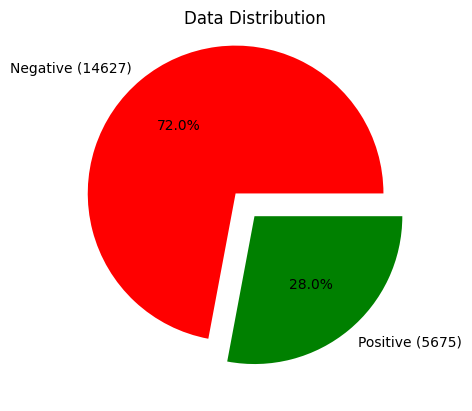

In [218]:
df = df_filtered
positive_sample = df[(df["Flag"]==1)]
negative_sample = df[(df["Flag"]==0)]
dist = df["Flag"].value_counts()

_ = plt.pie(dist, labels = ["Negative ({0})".format(len(negative_sample)), "Positive ({0})".format(len(positive_sample))], colors = ["r", "g"], explode=[0.2, 0], autopct='%1.1f%%')
_ = plt.title("Data Distribution")

In [219]:
#df_filtered = np.array(df_filtered)
df_filtered.shape

(20302, 11)

In [220]:
resampledOver, unselected_Over = ballanced(df_filtered,"O")
resampledOver.shape

(29254, 11)

In [221]:
resampledUnder, unselected_Under = ballanced(df_filtered,"U")
resampledUnder.shape

(11350, 11)

In [222]:
resampledSmote, unselected_Smote = ballanced(df_filtered,"S")
resampledSmote.shape

(29254, 11)

In [223]:
resampledOver.head(10)

,Flag,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Total_transaction,Number_of_Created_Contracts,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent
0,1,7.973236e+07,11971.000000,23,0,0.000410,14.331000,5.856601,39.041473,39.044000,39.043158
1,1,5.434648e+07,1281.695652,53,0,0.004312,208.090009,7.173130,0.000000,82.000000,9.389806
2,1,1.771695e+08,4494.500000,15,0,0.010000,100.000000,18.246100,15.194834,39.540900,27.368174
3,1,3.213748e+08,0.000000,6,0,5.000000,24.178631,10.100583,60.502305,60.502305,60.502305
4,1,7.971622e+07,12812.750000,24,0,0.002290,21.000000,4.088321,13.182630,41.477000,25.440253
5,1,5.127940e+07,8207.500000,43,0,0.000000,0.278352,0.040710,0.019265,0.250000,0.108149
6,1,1.739483e+08,0.000000,10,0,0.005000,3.000000,0.360039,3.240113,3.240113,3.240113
7,1,3.412000e+01,1457.310000,16,0,1.000000,2.501052,1.348445,1.000875,11.277872,5.842916
8,1,0.000000e+00,0.000000,2,0,3.100000,3.100000,3.100000,3.098614,3.098614,3.098614
9,1,8.347700e+02,3976.500000,4,0,0.586269,0.947515,0.766892,0.585408,0.947284,0.766346


#***Rescaling***

In [224]:
resampledOver.shape

(29254, 11)

In [225]:
resampledOver.head(10)

,Flag,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Total_transaction,Number_of_Created_Contracts,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent
0,1,7.973236e+07,11971.000000,23,0,0.000410,14.331000,5.856601,39.041473,39.044000,39.043158
1,1,5.434648e+07,1281.695652,53,0,0.004312,208.090009,7.173130,0.000000,82.000000,9.389806
2,1,1.771695e+08,4494.500000,15,0,0.010000,100.000000,18.246100,15.194834,39.540900,27.368174
3,1,3.213748e+08,0.000000,6,0,5.000000,24.178631,10.100583,60.502305,60.502305,60.502305
4,1,7.971622e+07,12812.750000,24,0,0.002290,21.000000,4.088321,13.182630,41.477000,25.440253
5,1,5.127940e+07,8207.500000,43,0,0.000000,0.278352,0.040710,0.019265,0.250000,0.108149
6,1,1.739483e+08,0.000000,10,0,0.005000,3.000000,0.360039,3.240113,3.240113,3.240113
7,1,3.412000e+01,1457.310000,16,0,1.000000,2.501052,1.348445,1.000875,11.277872,5.842916
8,1,0.000000e+00,0.000000,2,0,3.100000,3.100000,3.100000,3.098614,3.098614,3.098614
9,1,8.347700e+02,3976.500000,4,0,0.586269,0.947515,0.766892,0.585408,0.947284,0.766346


In [226]:
df_filteredTron.head(10)

,Flag,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Total_transaction,Number_of_Created_Contracts,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent
0,1,7.973236e+07,11971.000000,23.0,0.0,0.000410,14.331000,5.856601,39.041473,39.044000,39.043158
1,1,5.434648e+07,1281.695652,53.0,0.0,0.004312,208.090009,7.173130,0.000000,82.000000,9.389806
2,1,1.771695e+08,4494.500000,15.0,0.0,0.010000,100.000000,18.246100,15.194834,39.540900,27.368174
3,1,3.213748e+08,0.000000,6.0,0.0,5.000000,24.178631,10.100583,60.502305,60.502305,60.502305
4,1,7.971622e+07,12812.750000,24.0,0.0,0.002290,21.000000,4.088321,13.182630,41.477000,25.440253
5,1,5.127940e+07,8207.500000,43.0,0.0,0.000000,0.278352,0.040710,0.019265,0.250000,0.108149
6,1,1.739483e+08,0.000000,10.0,0.0,0.005000,3.000000,0.360039,3.240113,3.240113,3.240113
7,1,3.412000e+01,1457.310000,16.0,0.0,1.000000,2.501052,1.348445,1.000875,11.277872,5.842916
8,1,0.000000e+00,0.000000,2.0,0.0,3.100000,3.100000,3.100000,3.098614,3.098614,3.098614
9,1,8.347700e+02,3976.500000,4.0,0.0,0.586269,0.947515,0.766892,0.585408,0.947284,0.766346


In [227]:
X_reshapedO,y_reshapedO = scaled(resampledOver)
X_reshapedO.shape

(29254, 10)

In [228]:
# Assuming df_filteredTron is your DataFrame
df_filteredTron = df_filteredTron.select_dtypes(include=[np.number])


In [229]:
df_filteredTron.shape
data = df_filteredTron

In [230]:
data.shape

(593, 11)

In [231]:
label_encoder = LabelEncoder()
data['Flag'] = label_encoder.fit_transform(data['Flag'])
# Splitting the data into features (X) and labels (y)
X =  data.drop(['Flag'], axis=1)
X.shape


(593, 10)

In [232]:
y = data['Flag']
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [233]:
X_scaled.shape

(593, 10)

In [234]:

XTron_reshapedU,yTron_reshapedU= scaled(df_filteredTron)
XTron_reshapedU.shape

(593, 10)

In [235]:
pd.DataFrame(XTron_reshapedU).head(10)

,0,1,2,3,4,5,6,7,8,9
0,0.165630,-0.068507,-0.218819,-0.04256,-0.217903,-0.173083,-0.201738,7.133822,-0.107165,0.016426
1,0.005434,-0.069454,-0.218819,-0.04256,-0.217869,0.060855,-0.196034,-0.228176,-0.080728,-0.153615
2,0.780502,-0.069169,-0.218819,-0.04256,-0.217820,-0.069649,-0.148054,2.637093,-0.106859,-0.050521
3,1.690501,-0.069568,-0.218819,-0.04256,-0.174892,-0.161194,-0.183349,11.180661,-0.093959,0.139480
4,0.165528,-0.068432,-0.218819,-0.04256,-0.217887,-0.165032,-0.209401,2.257655,-0.105667,-0.061577
5,-0.013921,-0.068840,-0.218819,-0.04256,-0.217907,-0.190050,-0.226939,-0.224543,-0.131040,-0.206839
6,0.760175,-0.069568,-0.218819,-0.04256,-0.217864,-0.186764,-0.225556,0.382808,-0.129200,-0.188879
7,-0.337516,-0.069439,-0.218819,-0.04256,-0.209304,-0.187367,-0.221273,-0.039442,-0.124253,-0.173954
8,-0.337516,-0.069568,-0.218819,-0.04256,-0.191238,-0.186643,-0.213683,0.356126,-0.129287,-0.189691
9,-0.337511,-0.069215,-0.218819,-0.04256,-0.212863,-0.189242,-0.223793,-0.117786,-0.130611,-0.203065


In [236]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test =  train_test_split(X_reshaped, df_filtered['Flag'], test_size=0.1, random_state=42)

In [237]:
X_trainO, X_testO, y_trainO, y_testO =  train_test_split(X_reshapedO, y_reshapedO, test_size=0.1, random_state=42)

In [238]:
X_trainU, X_testU, y_trainU, y_testU =  train_test_split(X_reshapedS, y_reshapedS, test_size=0.1, random_state=42)

In [239]:
X_trainS, X_testS, y_trainS, y_testS =  train_test_split(X_reshapedU, y_reshapedU, test_size=0.1, random_state=42)

In [240]:
# Define the list of training/testing sets
training_sets = [(X_train, y_train), (X_trainO, y_trainO), (X_trainU, y_trainU), (X_trainS, y_trainS)]
testing_sets = [(X_test, y_test), (X_testO, y_testO), (X_testU, y_testU), (X_testS, y_testS)]

# #**Ethereume && Tron **

Transfer Learning

In [241]:
from sklearn.model_selection import KFold


In [242]:
kf = KFold(n_splits=10, random_state = 42, shuffle=True)
fld = 1
i = 1
X = np.concatenate([X_trainO, X_testO], axis=0)
y = np.concatenate([y_trainO, y_testO], axis=0)


In [243]:
X_train, X_POtest, y_train, y_POtest = train_test_split(X, y, test_size=0.2, random_state=42)

In [244]:

results = {}


In [245]:
X_df = pd.DataFrame(X_train)
y_df = pd.DataFrame(y_train)

#Ether

In [246]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_curve, roc_auc_score

import time

In [247]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import KFold


In [248]:
kf = KFold(n_splits=10, random_state = 42, shuffle=True)
fld = 1
i = 1
X = np.concatenate([X_trainO, X_testO], axis=0)
y = np.concatenate([y_trainO, y_testO], axis=0)


In [249]:
X_train, X_POtest, y_train, y_POtest = train_test_split(X, y, test_size=0.2, random_state=42)

In [250]:

results = {}


In [251]:
X_df = pd.DataFrame(X_train)
y_df = pd.DataFrame(y_train)

In [252]:
ExtraTrees = ExtraTreesClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)
XGB = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


In [253]:
from sklearn.ensemble import VotingClassifier
import time

In [254]:
voting_clf = VotingClassifier(estimators=[
    ('extra_trees', ExtraTrees),
    ('XGB', XGB)],
    voting='soft')
fld=1

In [255]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, roc_auc_score


In [256]:
for train_index, test_index in kf.split(X_train):

    TotalTraining_time = 0
    TotalInference_Time = 0

    X_trainV, X_testV = X_df.iloc[train_index], X_df.iloc[test_index]
    y_trainV, y_testV = y_df.iloc[train_index, 0], y_df.iloc[test_index, 0]  # Convert to Series if y_df is single column DataFrame

    start_time = time.time()
    RF.fit(X_trainV, y_trainV)
    TotalTraining_time += time.time() - start_time

    # Use argsort directly on feature_importances_, then use .iloc for proper indexing
    important_features = np.argsort(RF.feature_importances_)[::-1]

    start_time = time.time()
    # Adjust indexing for pandas DataFrame
    voting_clf.fit(X_trainV.iloc[:, important_features[:]], y_trainV)  # Assuming you want to select top 10 features
    TotalTraining_time += time.time() - start_time

    start_time = time.time()
    # Adjust indexing for pandas DataFrame in prediction as well
    V_predictions = voting_clf.predict(X_testV.iloc[:, important_features[:]])
    TotalInference_Time += time.time() - start_time

    accuracy = accuracy_score(y_testV, V_predictions)
    precision = precision_score(y_testV, V_predictions)
    recall = recall_score(y_testV, V_predictions)
    f1 = f1_score(y_testV, V_predictions)
    kappa = cohen_kappa_score(y_testV, V_predictions)
    #confusion_matrix = confusion_matrix(y_testV, V_predictions)
    roc_auc = roc_auc_score(y_testV, V_predictions)
    fpr, tpr, thresholds = roc_curve(y_testV, V_predictions)

    results[f'Model_{fld}'] = { 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1,'kappa':kappa,'roc_auc':roc_auc
                                      ,'tpr':tpr,'thresholds':thresholds,'Inference_Time':TotalInference_Time,'Training_time':TotalTraining_time}


    print(f'Metrics for Fold {fld}:')
    print(f"Inference Time: {TotalInference_Time:.4f} seconds")
    print(f"training Time: {TotalTraining_time:.4f} seconds")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"kappa: {kappa:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print(f"fpr: {fpr}")
    print(f"tpr: {tpr}")
    print(f"thresholds: {thresholds}")
   # print(confusion_matrix)
    print("********************************************************************")

    fld += 1


Metrics for Fold 1:
Inference Time: 0.0943 seconds
training Time: 7.9632 seconds
Accuracy: 0.95
Precision: 0.93
Recall: 0.96
F1-score: 0.95
kappa: 0.89
ROC AUC: 0.95
fpr: [0.         0.07216495 1.        ]
tpr: [0.         0.96431606 1.        ]
thresholds: [2 1 0]
********************************************************************
Metrics for Fold 2:
Inference Time: 0.1256 seconds
training Time: 6.8346 seconds
Accuracy: 0.95
Precision: 0.93
Recall: 0.97
F1-score: 0.95
kappa: 0.90
ROC AUC: 0.95
fpr: [0.         0.06982759 1.        ]
tpr: [0.         0.96528366 1.        ]
thresholds: [2 1 0]
********************************************************************
Metrics for Fold 3:
Inference Time: 0.0942 seconds
training Time: 7.7283 seconds
Accuracy: 0.96
Precision: 0.94
Recall: 0.97
F1-score: 0.96
kappa: 0.91
ROC AUC: 0.96
fpr: [0.         0.05944056 1.        ]
tpr: [0.         0.96992481 1.        ]
thresholds: [2 1 0]
****************************************************************

In [257]:
pd.DataFrame(X_POtest).head(10)

,0,1,2,3,4,5,6,7,8,9
0,-0.469952,-0.067729,-0.288660,-0.019083,-0.058808,-0.034062,-0.030969,-0.030242,-0.032989,-0.082933
1,-0.469952,-0.067588,-0.287232,-0.019083,-0.054602,-0.033810,-0.029833,-0.030037,-0.032626,-0.079583
2,1.474629,-0.002154,-0.283900,-0.019083,-0.058709,-0.032539,-0.027772,-0.030242,-0.028824,-0.070361
3,-0.469952,-0.067729,-0.288660,-0.019083,-0.058808,-0.034062,-0.030969,-0.030242,-0.032989,-0.082933
4,0.561269,-0.054060,-0.250111,-0.019083,-0.058808,-0.034023,-0.030924,-0.030242,-0.032737,-0.082757
5,3.830730,-0.065661,-0.286280,-0.019083,-0.057937,-0.033971,-0.030646,-0.030242,-0.032795,-0.081666
6,-0.469918,-0.067658,-0.230599,-0.019083,-0.058597,-0.026370,-0.023136,-0.030242,-0.020294,-0.062511
7,-0.469949,-0.067729,-0.287232,-0.019083,-0.056748,-0.033925,-0.030382,-0.021808,-0.032605,-0.076032
8,-0.469951,-0.067729,-0.272479,-0.019083,-0.058803,-0.032803,-0.030330,0.121733,-0.026061,0.041414
9,-0.456729,-0.067487,0.158216,-0.019083,-0.058800,-0.033845,-0.030891,-0.030207,-0.032377,-0.081896


In [258]:
V_predictions = voting_clf.predict(X_POtest[:, important_features[:]])
accuracy_clf = accuracy_score(y_POtest, V_predictions)
accuracy = accuracy_score(y_POtest, V_predictions)
precision = precision_score(y_POtest, V_predictions)
recall = recall_score(y_POtest, V_predictions)
f1 = f1_score(y_POtest, V_predictions)
kappa = cohen_kappa_score(y_POtest, V_predictions)
roc_auc = roc_auc_score(y_POtest, V_predictions)
fpr, tpr, thresholds = roc_curve(y_POtest, V_predictions)

In [259]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"kappa: {kappa:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"fpr: {fpr}")
print(f"tpr: {tpr}")
print(f"thresholds: {thresholds}")

Accuracy: 0.94
Precision: 0.92
Recall: 0.97
F1-score: 0.95
kappa: 0.89
ROC AUC: 0.94
fpr: [0.         0.07879411 1.        ]
tpr: [0.         0.96623465 1.        ]
thresholds: [2 1 0]


In [260]:
# Initialize lists to store metric values
accuracies = []
precisions = []
recalls = []
f1_scores = []
kappas = []
Inference_Time = []
Training_time = []
roc_auc = []
# Loop over the results dictionary
for model, metrics in results.items():
    accuracies.append(metrics['accuracy'])
    precisions.append(metrics['precision'])
    recalls.append(metrics['recall'])
    f1_scores.append(metrics['f1'])
    kappas.append(metrics['kappa'])
    Inference_Time.append(metrics['Inference_Time'])
    Training_time.append(metrics['Training_time'])
    roc_auc.append(metrics['roc_auc'])

# Calculate the best, worst, and average values for each metric
best_accuracy = round(max(accuracies), 2)
worst_accuracy = round(min(accuracies), 2)
average_accuracy = round(sum(accuracies) / len(accuracies), 2)


best_precision = round(max(precisions), 2)
worst_precision = round(min(precisions), 2)
average_precision = round(sum(precisions) / len(precisions), 3)

best_recall = round(max(recalls), 2)
worst_recall = round(min(recalls), 2)
average_recall = round(sum(recalls) / len(recalls), 2)

best_f1_score = round(max(f1_scores), 2)
worst_f1_score = round(min(f1_scores), 2)
average_f1_score = round(sum(f1_scores) / len(f1_scores), 2)

best_kappa = round(max(kappas), 2)
worst_kappa = round(min(kappas), 2)
average_kappa = round(sum(kappas) / len(kappas), 2)

best_Inference_Time = round(max(Inference_Time), 5)
worst_Inference_Time = round(min(Inference_Time), 5)
average_Inference_Time = round(sum(Inference_Time) / len(Inference_Time), 5)


best_Training_time = round(max(Training_time), 5)
worst_Training_time = round(min(Training_time), 5)
average_Training_time = round(sum(Training_time) / len(Training_time), 5)

best_roc_auc = round(max(roc_auc), 2)
worst_roc_auc = round(min(roc_auc), 2)
average_roc_auc = round(sum(roc_auc) / len(roc_auc), 2)

# Print the results
print("Best Accuracy:", best_accuracy)
print("Worst Accuracy:", worst_accuracy)
print("Average Accuracy:", average_accuracy)

print("************************************************")


print("Best Precision:", best_precision)
print("Worst Precision:", worst_precision)
print("Average Precision:", average_precision)
print("************************************************")

print("Best Recall:", best_recall)
print("Worst Recall:", worst_recall)
print("Average Recall:", average_recall)
print("************************************************")

print("Best F1 Score:", best_f1_score)
print("Worst F1 Score:", worst_f1_score)
print("Average F1 Score:", average_f1_score)
print("************************************************")

print("Best Kappa:", best_kappa)
print("Worst Kappa:", worst_kappa)
print("Average Kappa:", average_kappa)

print("************************************************")

print("Best Inference_Time:", best_Inference_Time)
print("Worst Inference_Time:", worst_Inference_Time)
print("Average Inference_Time:", average_Inference_Time)
print("************************************************")

print("Best Training_time:", best_Training_time)
print("Worst Training_time:", worst_Training_time)
print("Average Training_time:", average_Training_time)
print("************************************************")

print("Best roc_auc:", best_roc_auc)
print("Worst roc_auc:", worst_roc_auc)
print("Average roc_auc:", average_roc_auc)


Best Accuracy: 0.96
Worst Accuracy: 0.94
Average Accuracy: 0.95
************************************************
Best Precision: 0.94
Worst Precision: 0.91
Average Precision: 0.929
************************************************
Best Recall: 0.99
Worst Recall: 0.96
Average Recall: 0.97
************************************************
Best F1 Score: 0.96
Worst F1 Score: 0.94
Average F1 Score: 0.95
************************************************
Best Kappa: 0.91
Worst Kappa: 0.89
Average Kappa: 0.9
************************************************
Best Inference_Time: 0.13082
Worst Inference_Time: 0.09423
Average Inference_Time: 0.10249
************************************************
Best Training_time: 8.3324
Worst Training_time: 6.72566
Average Training_time: 7.51443
************************************************
Best roc_auc: 0.96
Worst roc_auc: 0.95
Average roc_auc: 0.95


#**Tron**






In [261]:
yT =  pd.DataFrame(yTron_reshapedU)
important_features = range(XTron_reshapedU.shape[1])  # Assuming XTron_reshapedU.shape[1] is the correct number of features

xT = XTron_reshapedU[:,:]

In [262]:
important_features

range(0, 10)

In [263]:
pd.DataFrame(xT).head(10)

,0,1,2,3,4,5,6,7,8,9
0,0.165630,-0.068507,-0.218819,-0.04256,-0.217903,-0.173083,-0.201738,7.133822,-0.107165,0.016426
1,0.005434,-0.069454,-0.218819,-0.04256,-0.217869,0.060855,-0.196034,-0.228176,-0.080728,-0.153615
2,0.780502,-0.069169,-0.218819,-0.04256,-0.217820,-0.069649,-0.148054,2.637093,-0.106859,-0.050521
3,1.690501,-0.069568,-0.218819,-0.04256,-0.174892,-0.161194,-0.183349,11.180661,-0.093959,0.139480
4,0.165528,-0.068432,-0.218819,-0.04256,-0.217887,-0.165032,-0.209401,2.257655,-0.105667,-0.061577
5,-0.013921,-0.068840,-0.218819,-0.04256,-0.217907,-0.190050,-0.226939,-0.224543,-0.131040,-0.206839
6,0.760175,-0.069568,-0.218819,-0.04256,-0.217864,-0.186764,-0.225556,0.382808,-0.129200,-0.188879
7,-0.337516,-0.069439,-0.218819,-0.04256,-0.209304,-0.187367,-0.221273,-0.039442,-0.124253,-0.173954
8,-0.337516,-0.069568,-0.218819,-0.04256,-0.191238,-0.186643,-0.213683,0.356126,-0.129287,-0.189691
9,-0.337511,-0.069215,-0.218819,-0.04256,-0.212863,-0.189242,-0.223793,-0.117786,-0.130611,-0.203065


In [265]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer and transform xT to fill NaNs
xT_imputed = imputer.fit_transform(xT)

# Now you can predict without encountering NaN issues
Tron_predictions = voting_clf.predict(xT_imputed)
accuracy = accuracy_score(yT, Tron_predictions)
precision = precision_score(yT, Tron_predictions)
recall = recall_score(yT, Tron_predictions)
f1 = f1_score(yT, Tron_predictions)


In [269]:
kappa = cohen_kappa_score(yT, Tron_predictions)
roc_auc = roc_auc_score(yT, Tron_predictions)
fpr, tpr, thresholds = roc_curve(yT, Tron_predictions)

In [266]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.19
Precision: 0.02
Recall: 0.45
F1-score: 0.04


In [272]:
print(f"kappa: {kappa:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"fpr: {fpr}")
print(f"tpr: {tpr}")
print(f"thresholds: {thresholds}")


kappa: -0.03
ROC AUC: 0.32
fpr: [0.         0.81849913 1.        ]
tpr: [0.   0.45 1.  ]
thresholds: [2 1 0]


In [273]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming xT_imputed is your test dataset after imputation and voting_clf is your trained classifier
# Also assuming yT is the true target values for xT

# Prediction
Tron_predictions = voting_clf.predict(xT_imputed)

# Evaluation Metrics
accuracy = accuracy_score(yT, Tron_predictions)
precision = precision_score(yT, Tron_predictions)
recall = recall_score(yT, Tron_predictions)
f1 = f1_score(yT, Tron_predictions)
conf_matrix = confusion_matrix(yT, Tron_predictions)

# Printing the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.1906
Precision: 0.0188
Recall: 0.4500
F1 Score: 0.0361
Confusion Matrix:
[[104 469]
 [ 11   9]]
